# Famous Paintings Color Data Project

Description: This project uses Beautifulsoup to scrape data on famous paintings from:

https://en.most-famous-paintings.com/MostFamousPaintings.nsf/ListOfTop500MostPopularPainting?OpenForm



It then uses my color_palette_extractor function to get color palette info for each image.
Info is stored as a csv file. 

## Imports

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import math
import sys
sys.path.append(r'C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor')
sys.path.append(r'C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\KNN from Scratch')
from KNN_ALGO import KNN
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from Color_Palette_Extractor_V3 import get_palette
import colormath


## Request page source from URL

In [3]:
mfp_url = "https://en.most-famous-paintings.com/MostFamousPaintings.nsf/ListOfTop500MostPopularPainting?OpenForm"

In [4]:
mfp_page = requests.get(mfp_url)

In [30]:
#display some of the page source code
print(mfp_page.content[:5000])

b'<!DOCTYPE html><html>\n<head>\n\n\n<Base href="https://EN.Most-Famous-Paintings.com/MostFamousPaintings.nsf/">\n\n<link rel=\'stylesheet\' type=\'text/css\' href="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/MFP-NEW-CSS.css">\n<link rel=\'stylesheet\' type=\'text/css\' href="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/MFP-Header.css">\n<link rel=\'stylesheet\' type=\'text/css\' href="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/CSS-DBRIS.css">\n\n<Script>var Lg = \'EN\'; var loc=\'https://EN.Most-Famous-Paintings.com/MostFamousPaintings.nsf/\'; </Script> \n<script type="text/javascript" src="https://code.jquery.com/jquery-2.2.2.min.js"></script>\n<script type="text/javascript" src="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/ArtsDot-Grayscale_Filter-Script.js"></script>\n<script type="text/javascript" src="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/ArtsDot-Grayscale_Filter-Funtions-Script.js"></script

In [31]:
#html parse data
mfp_soup = BeautifulSoup(mfp_page.content, "html.parser")
print(mfp_soup.prettify()[:5000])

<!DOCTYPE html>
<html>
 <head>
  <base href="https://EN.Most-Famous-Paintings.com/MostFamousPaintings.nsf/"/>
  <link href="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/MFP-NEW-CSS.css" rel="stylesheet" type="text/css"/>
  <link href="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/MFP-Header.css" rel="stylesheet" type="text/css"/>
  <link href="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/CSS-DBRIS.css" rel="stylesheet" type="text/css"/>
  <script>
   var Lg = 'EN'; var loc='https://EN.Most-Famous-Paintings.com/MostFamousPaintings.nsf/';
  </script>
  <script src="https://code.jquery.com/jquery-2.2.2.min.js" type="text/javascript">
  </script>
  <script src="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/ArtsDot-Grayscale_Filter-Script.js" type="text/javascript">
  </script>
  <script src="https://en.most-famous-paintings.com/MostFamousPaintings.nsf/ArtsDot-Grayscale_Filter-Funtions-Script.js" type="text/javascript">
  </scrip

##### It looks like each paiting is a 'div' elements with class= 'mosaicflow__item'

In [32]:
#We will assign each to a paintings variable

paintings = mfp_soup.find_all('div', class_="mosaicflow__item")
#display first 5 painting
paintings[:5]

[<div class="mosaicflow__item">
 <a alt="Leonardo Da Vinci - 'Mona Lisa (La Gioconda)' (Top Painting 1/1000)" href="A?Open&amp;A=8XYFFG">
 <img alt="(Famous painting ranked 1/1000) - Leonardo Da Vinci - 'Mona Lisa (La Gioconda)'" class="Most-Famous-Paintings-Padding-Img lazy" data-original="/Art.nsf/O/8XYFFG/$File/Leonardo-Da-Vinci-Mona-Lisa-La-Gioconda--S.jpg" height="300" width="198"/>
 <span>
 <p class="Most-Famous-Paintings-MouseOver-Img-Title-Color">Leonardo Da Vinci</p>
 <p class="Most-Famous-Paintings-MouseOver-Img-Name-Artwork-Color"> Mona Lisa (La Gioconda) (1/1000)</p>
 </span>
 </a>
 </div>,
 <div class="mosaicflow__item">
 <a alt="Vincent Van Gogh - 'The Starry Night' (Top Painting 2/1000)" href="A?Open&amp;A=5ZKG47">
 <img alt="(Famous painting ranked 2/1000) - Vincent Van Gogh - 'The Starry Night'" class="Most-Famous-Paintings-Padding-Img lazy" data-original="/Art.nsf/O/5ZKG47/$File/Vincent-Van-Gogh-Starry-Night-S.jpg" height="240" width="300"/>
 <span>
 <p class="Most-Fa

In [33]:
#Make sure the paintings list has all 500 paintings
print(len(paintings))

500


The relevant data for artist name, painting name, and image url:

* artist name is a 'p' tag withclass="Most-Famous-Paintings-MouseOver-Img-Title-Color"
* Painting name is a 'p' tag with class = "Most-Famous-Paintings-MouseOver-Img-Name-Artwork-Color"
* image urls are 'img'tag  class_='Most-Famous-Paintings-Padding-Img lazy', and "data-original= URL" 

I need to see how to get the URL for the images

In [9]:
#make empty lists for relevant info

Images = []
Artist = []
Work = []

for painting in paintings:
    
    #get artist name and add to Artist list
    artist_name = painting.find('p', class_= "Most-Famous-Paintings-MouseOver-Img-Title-Color").text
    Artist.append(artist_name)
    
    #get Work name and add to Work list:
    work_name = painting.find('p', class_= "Most-Famous-Paintings-MouseOver-Img-Name-Artwork-Color" ).text
    Work.append(work_name)
    
    #get image URL:
    image_url = "https://en.most-famous-paintings.com" + painting.find('img')['data-original']
    Images.append(image_url)
    
print (len(Images))
print (len(Artist))
print (len(Work))

500
500
500


In [10]:
Images[0:5]

['https://en.most-famous-paintings.com/Art.nsf/O/8XYFFG/$File/Leonardo-Da-Vinci-Mona-Lisa-La-Gioconda--S.jpg',
 'https://en.most-famous-paintings.com/Art.nsf/O/5ZKG47/$File/Vincent-Van-Gogh-Starry-Night-S.jpg',
 'https://en.most-famous-paintings.com/Art.nsf/O/8XXU4K/$File/Edvard-Munch-The-Scream-S.jpg',
 'https://en.most-famous-paintings.com/Art.nsf/O/5ZKDK5/$File/Pablo-Picasso-Three-Musicians-S.JPG',
 'https://en.most-famous-paintings.com/Art.nsf/O/8XYC2C/$File/Jan-Vermeer-The-Girl-with-a-Pearl-Earring-S.jpg']

In [11]:
Artist[0:5]

['Leonardo Da Vinci',
 'Vincent Van Gogh',
 'Edvard Munch',
 'Pablo Picasso',
 'Jan Vermeer']

In [12]:
Work[0:5]

[' Mona Lisa (La Gioconda) (1/1000)',
 ' The Starry Night (2/1000)',
 ' The Scream (5/1000)',
 ' Three Musicians (6/1000)',
 ' The Girl with a Pearl Earring (8/1000)']

In [13]:
#We need to get rid of those parentheses:
works_without_parentheses = []
for work in Work:
    works_without_parentheses.append(work.split( '(')[0])
    
Work = works_without_parentheses

Work[0:5]


[' Mona Lisa ',
 ' The Starry Night ',
 ' The Scream ',
 ' Three Musicians ',
 ' The Girl with a Pearl Earring ']

In [14]:
art_data_df = pd.DataFrame({'Image': Images, 'Artist': Artist, 'Work': Work})

In [15]:
art_data_df.head()

,Image,Artist,Work
0,https://en.most-famous-paintings.com/Art.nsf/O...,Leonardo Da Vinci,Mona Lisa
1,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night
2,https://en.most-famous-paintings.com/Art.nsf/O...,Edvard Munch,The Scream
3,https://en.most-famous-paintings.com/Art.nsf/O...,Pablo Picasso,Three Musicians
4,https://en.most-famous-paintings.com/Art.nsf/O...,Jan Vermeer,The Girl with a Pearl Earring


In [16]:
art_data_df.tail()


,Image,Artist,Work
495,https://en.most-famous-paintings.com/Art.nsf/O...,Ernst Ludwig Kirchner,The Judgement of Paris
496,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Water Lilies
497,https://en.most-famous-paintings.com/Art.nsf/O...,George Grosz,The Agitator
498,https://en.most-famous-paintings.com/Art.nsf/O...,Tom Wesselmann,Still life no. 20
499,https://en.most-famous-paintings.com/Art.nsf/O...,Peder Severin Kroyer,Tarde de verano en Skagen


In [17]:
art_data_df.Image[:5]

0    https://en.most-famous-paintings.com/Art.nsf/O...
1    https://en.most-famous-paintings.com/Art.nsf/O...
2    https://en.most-famous-paintings.com/Art.nsf/O...
3    https://en.most-famous-paintings.com/Art.nsf/O...
4    https://en.most-famous-paintings.com/Art.nsf/O...
Name: Image, dtype: object

In [18]:
#Save df to csv
art_data_df.to_csv('Art_Data_df_pre_clf.csv', index = False)

# Run Color Palette Extractor on the Images from dataset

In [20]:
df = art_data_df

Color Palette Extractor returns: color_palette_hex_values, image_category, unique_colors_hex

We need to call get_pallete for the image path in each row of the 'Images" column of the df

Processing row 0
0
Cluster Label Names:  ['Dark-Greys', 'Dark-Greys', 'Cyans', 'Dark-Browns', 'Light-Browns / Tans', 'Dark-Browns']
Counter({'Light-Greys / Off-Whites': 5815, 'Pinks': 4040, 'Blues': 3576, 'Blacks': 2339, 'Oranges': 2174, 'Magenta-Pinks': 1819, 'Reds': 1688, 'Yellows': 783, 'Greens': 558, 'Red-Oranges': 405})
Color Labels after Similarity Function ['Blues' 'Magenta-Pinks' 'Oranges' 'Pinks' 'Red-Oranges' 'Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 5.28816351765518 35.763779527559066 51.96428571428572
5.28816351765518 35.763779527559066 51.96428571428572
#b06058
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


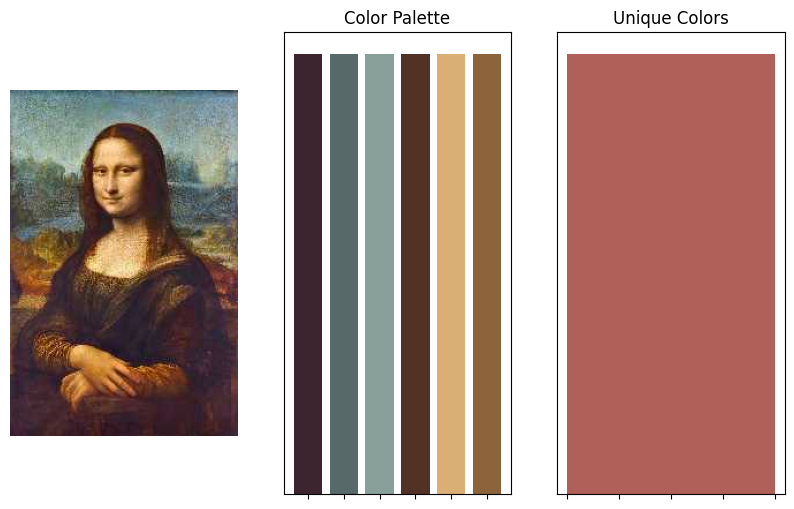

Processing row 1
1
Cluster Label Names:  ['Blacks', 'Blues', 'Blacks', 'Blues', 'Greens', 'Blues']
Counter({'Purples': 7673, 'Dark-Greys': 2587, 'Cyans': 2173, 'Light-Greys / Off-Whites': 1734, 'Yellows': 1617, 'Yellow-Greens': 393})
Color Labels after Similarity Function ['Light-Greys / Off-Whites' 'Yellows']
MOST CONTRASTING LABEL:  Yellows
MOST INTERESTING HSL BEFORE MODIFICATION 56.86566594677599 70.79464285714285 49.41463414634146
56.86566594677599 70.79464285714285 49.41463414634146
#d7cd24
Blueish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


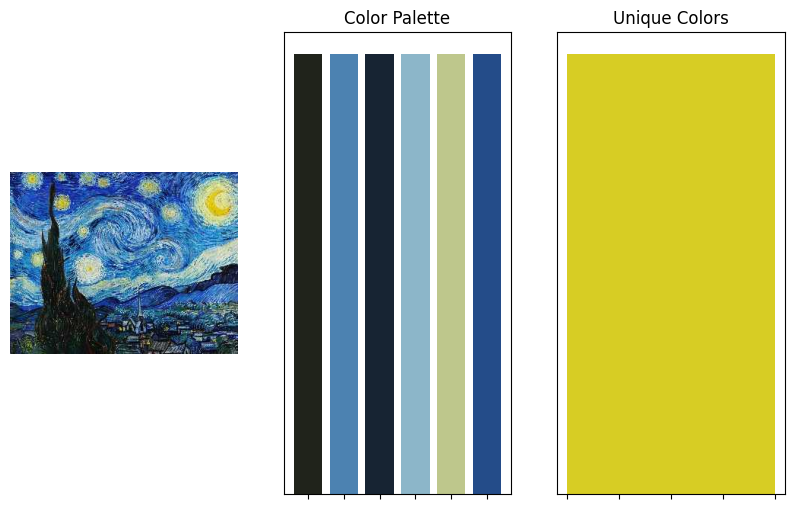

Processing row 2
2
Cluster Label Names:  ['Blues', 'Light-Browns / Tans', 'Oranges', 'Blues', 'Dark-Browns', 'Pinks']
Counter({'Dark-Greys': 9382, 'Blacks': 7346, 'Red-Oranges': 4997, 'Light-Greys / Off-Whites': 3159, 'Yellows': 2947, 'Reds': 2547, 'Purples': 1627, 'Cyans': 314, 'Greens': 259})
Color Labels after Similarity Function ['Cyans' 'Greens' 'Light-Greys / Off-Whites']
MOST CONTRASTING LABEL:  Cyans
MOST INTERESTING HSL BEFORE MODIFICATION 163.4137042902631 94.0 53.15384615384615
163.4137042902631 75 53.15384615384615
#2de1af
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


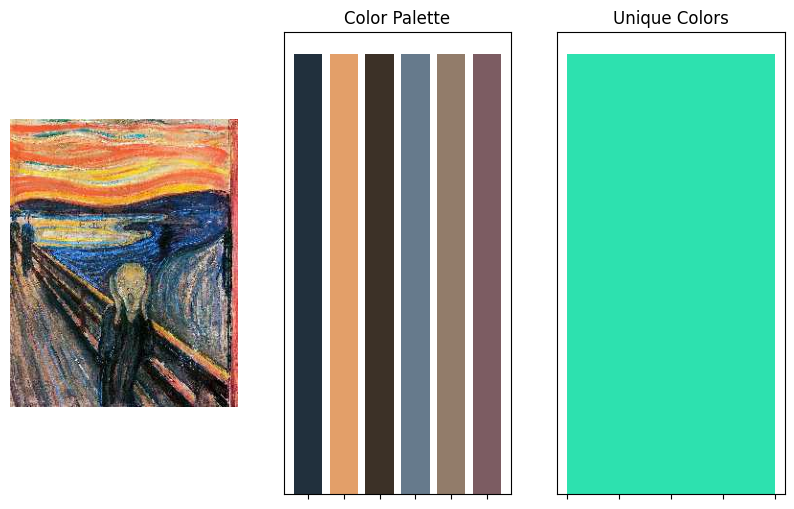

Processing row 3
3
Cluster Label Names:  ['Oranges', 'Dark-Browns', 'Purples', 'Yellow-Greens', 'Blacks', 'Magenta-Pinks']
Counter({'Yellows': 2942, 'Greens': 1857, 'Light-Greys / Off-Whites': 997, 'Red-Oranges': 920, 'Light-Browns / Tans': 352, 'Dark-Greys': 313, 'Reds': 251})
Color Labels after Similarity Function ['Light-Greys / Off-Whites']
MOST CONTRASTING LABEL:  None
This image does not have contrasting Unique Colors.


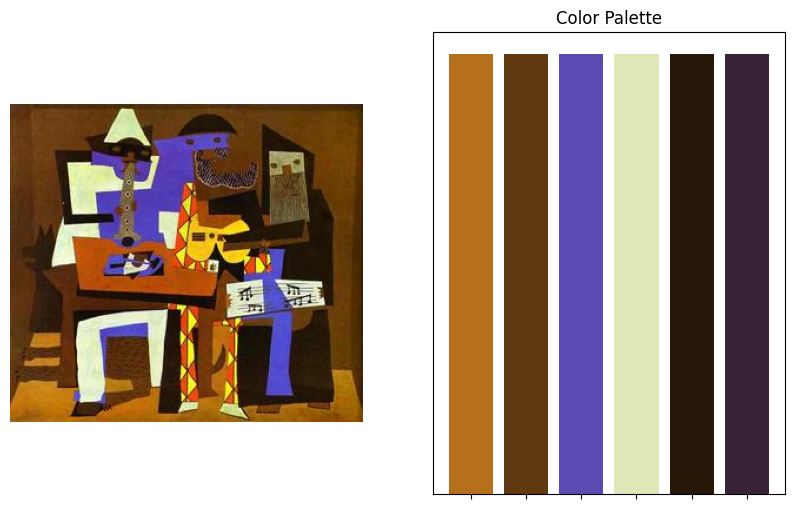

Processing row 4
4
Cluster Label Names:  ['Blacks', 'Yellows', 'Blues', 'Blacks', 'Light-Browns / Tans', 'Pinks']
Counter({'Dark-Browns': 4773, 'Oranges': 932, 'Light-Greys / Off-Whites': 534, 'Dark-Greys': 468, 'Reds': 407, 'Purples': 336, 'Greens': 295, 'Yellow-Greens': 287})
Color Labels after Similarity Function ['Greens' 'Light-Greys / Off-Whites' 'Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 5.387625752761294 88.54545454545455 43.8
5.387625752761294 75 43.8
#c32a1b
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


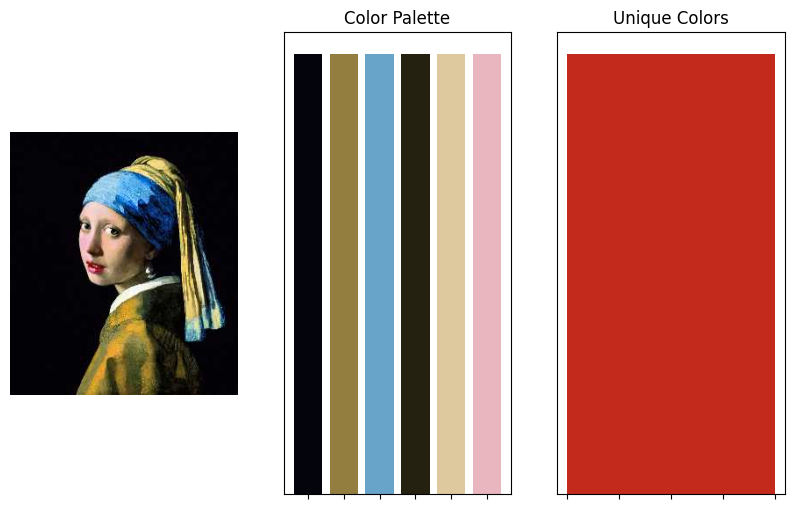

Processing row 5
5
Cluster Label Names:  ['Blacks', 'Light-Browns / Tans', 'Blacks', 'Dark-Browns', 'Blacks', 'Blacks']
Counter({'Yellows': 1939})
Color Labels after Similarity Function []
MOST CONTRASTING LABEL:  None
This image does not have contrasting Unique Colors.


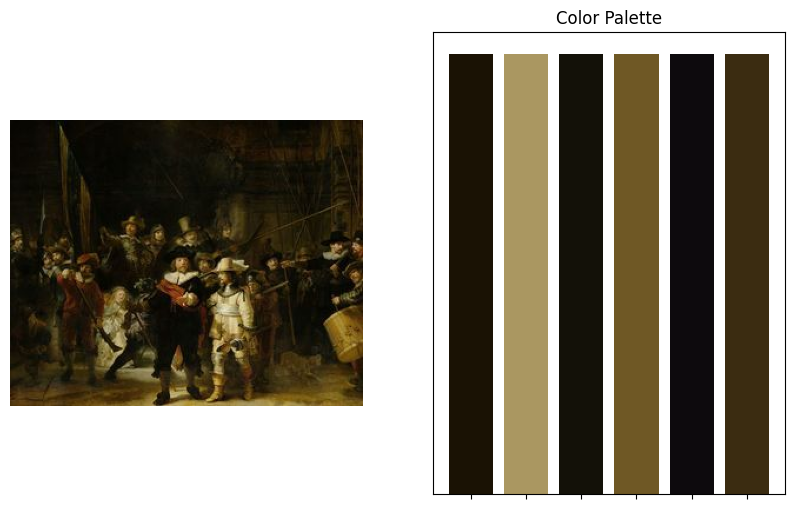

Processing row 6
6
Cluster Label Names:  ['Dark-Browns', 'Yellows', 'Greens', 'Dark-Browns', 'Dark-Browns', 'Purples']
Counter({'Blacks': 6337, 'Oranges': 4509, 'Light-Browns / Tans': 2435, 'Dark-Greys': 1042, 'Cyans': 672, 'Yellow-Greens': 587, 'Reds': 271})
Color Labels after Similarity Function ['Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 5.451441843180974 60.266666666666666 53.230769230769226
5.451441843180974 60.266666666666666 53.230769230769226
#cf4c3f
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


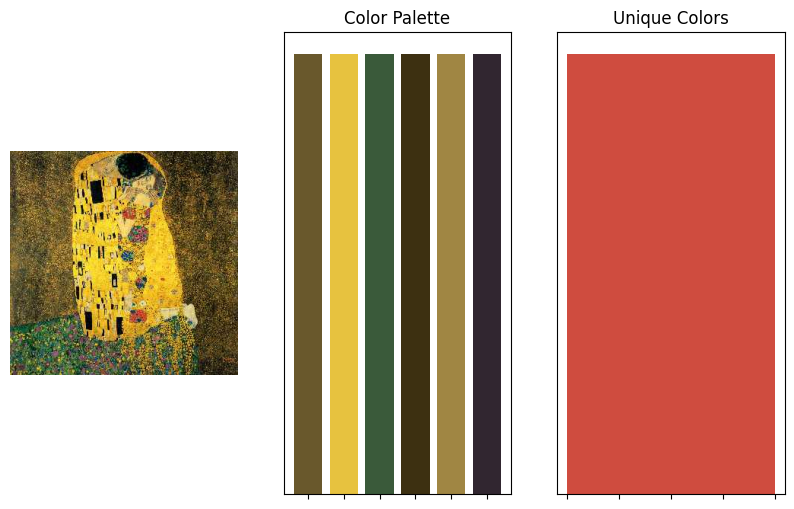

Processing row 7
7
Cluster Label Names:  ['Blues', 'Greens', 'Blues', 'Blues', 'Greens', 'Greens']
Counter({'Light-Greys / Off-Whites': 6329, 'Purples': 5616, 'Dark-Greys': 5583, 'Cyans': 4105, 'Blacks': 609, 'Yellow-Greens': 539, 'Yellows': 382})
Color Labels after Similarity Function ['Blacks' 'Dark-Greys' 'Light-Greys / Off-Whites' 'Yellows']
MOST CONTRASTING LABEL:  None
This image does not have contrasting Unique Colors.


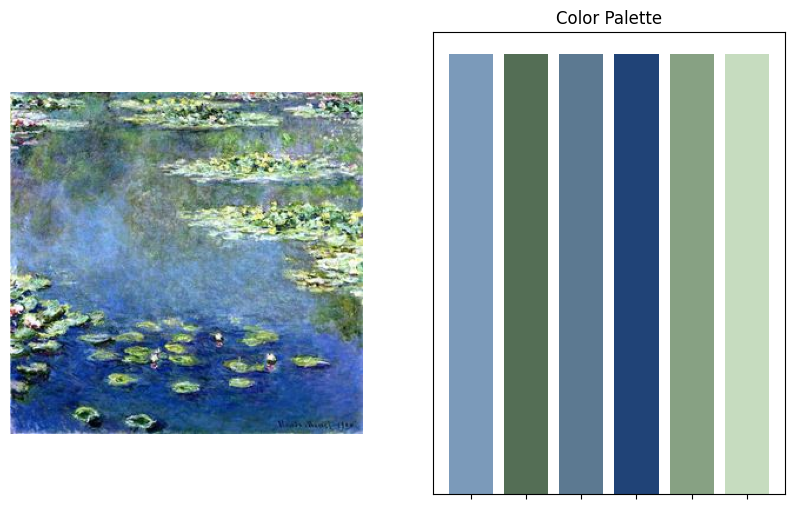

Processing row 8
8
Cluster Label Names:  ['Dark-Greys', 'Dark-Browns', 'Yellows', 'Light-Greys / Off-Whites', 'Light-Browns / Tans', 'Oranges']
Counter({'Blacks': 4870, 'Reds': 2992, 'Pinks': 1859, 'Red-Oranges': 1353, 'Greens': 1146, 'Yellow-Greens': 720, 'Purples': 426, 'Blues': 375})
Color Labels after Similarity Function ['Blues' 'Greens' 'Pinks' 'Purples']
MOST CONTRASTING LABEL:  Purples
MOST INTERESTING HSL BEFORE MODIFICATION 247.08122158422825 69.76666666666668 21.416666666666664
247.08122158422825 69.76666666666668 35
#291a97
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


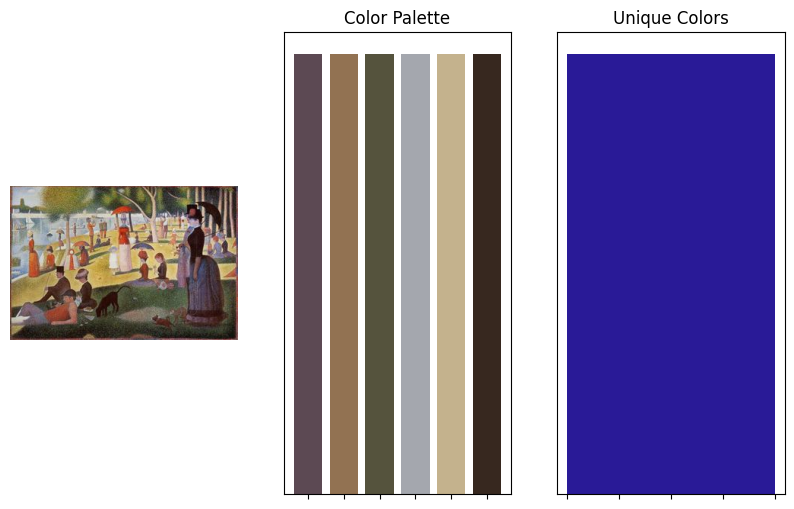

Processing row 9
9
Cluster Label Names:  ['Dark-Browns', 'Light-Greys / Off-Whites', 'Yellows', 'Blacks', 'Blacks', 'Yellows']
Counter({'Light-Browns / Tans': 7312, 'Dark-Greys': 2984, 'Greens': 1744, 'Cyans': 967, 'Oranges': 773, 'Yellow-Greens': 393})
Color Labels after Similarity Function ['Cyans' 'Greens']
MOST CONTRASTING LABEL:  Cyans
MOST INTERESTING HSL BEFORE MODIFICATION 161.85039362020692 77.76923076923077 25.403846153846153
161.85039362020692 77.76923076923077 35
#139e74
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


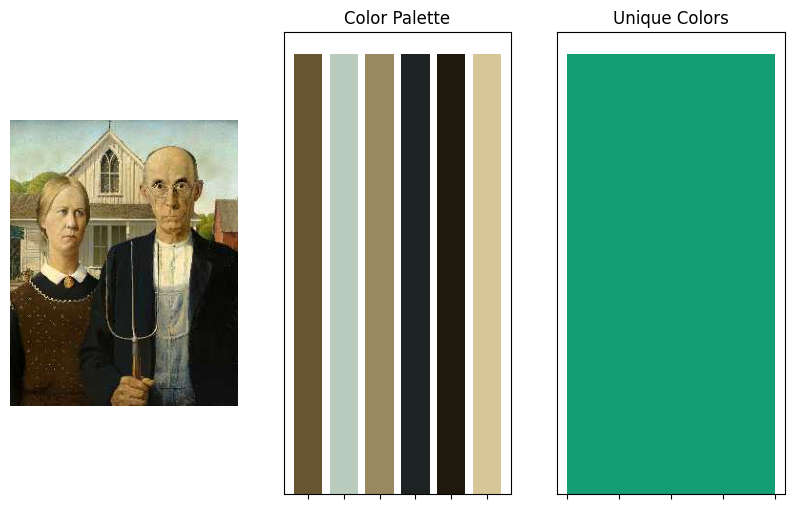

Processing row 10
10
Cluster Label Names:  ['Oranges', 'Blacks', 'Dark-Greys', 'Light-Greys / Off-Whites', 'Dark-Greys', 'Blacks']
Counter({'Yellows': 2705, 'Dark-Browns': 998, 'Reds': 685, 'Red-Oranges': 417, 'Light-Browns / Tans': 272})
Color Labels after Similarity Function ['Light-Browns / Tans']
MOST CONTRASTING LABEL:  None
This image does not have contrasting Unique Colors.


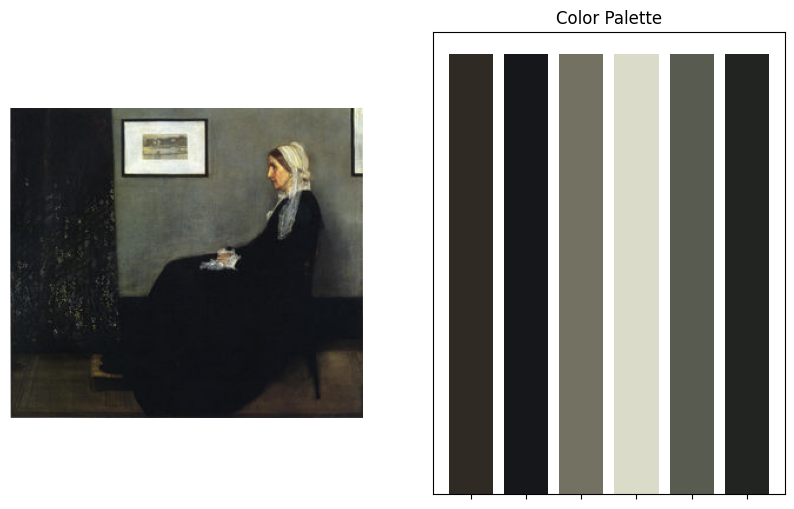

Processing row 11
11
Cluster Label Names:  ['Light-Browns / Tans', 'Purples', 'Yellows', 'Dark-Browns', 'Purples', 'Yellows']
Counter({'Blacks': 6620, 'Dark-Greys': 5923, 'Oranges': 4090, 'Greens': 2318, 'Blues': 2195, 'Light-Greys / Off-Whites': 1367, 'Red-Oranges': 647, 'Yellow-Greens': 561, 'Pinks': 441, 'Reds': 250})
Color Labels after Similarity Function ['Greens' 'Light-Greys / Off-Whites' 'Pinks' 'Red-Oranges' 'Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 5.018003273322422 77.5 31.538461538461533
5.018003273322422 77.5 35
#9e1f14
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


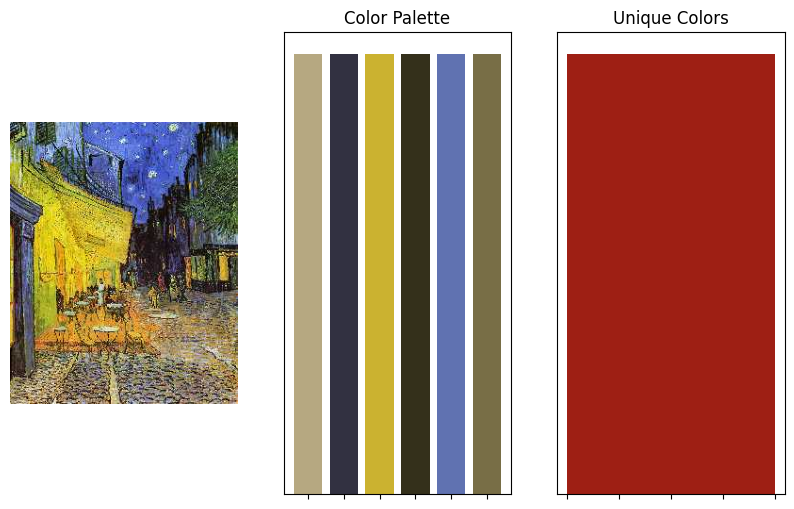

Processing row 12
12
Cluster Label Names:  ['Light-Greys / Off-Whites', 'Blacks', 'Dark-Browns', 'Light-Browns / Tans', 'Cyans', 'Dark-Greys']
Counter({'Blues': 6519, 'Pinks': 5564, 'Oranges': 1778, 'Yellows': 901, 'Red-Oranges': 661, 'Reds': 477, 'Greens': 360})
Color Labels after Similarity Function ['Blues' 'Oranges' 'Pinks' 'Red-Oranges' 'Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 4.635023183702513 97.0 53.5
4.635023183702513 75 53.5
#e13d2f
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


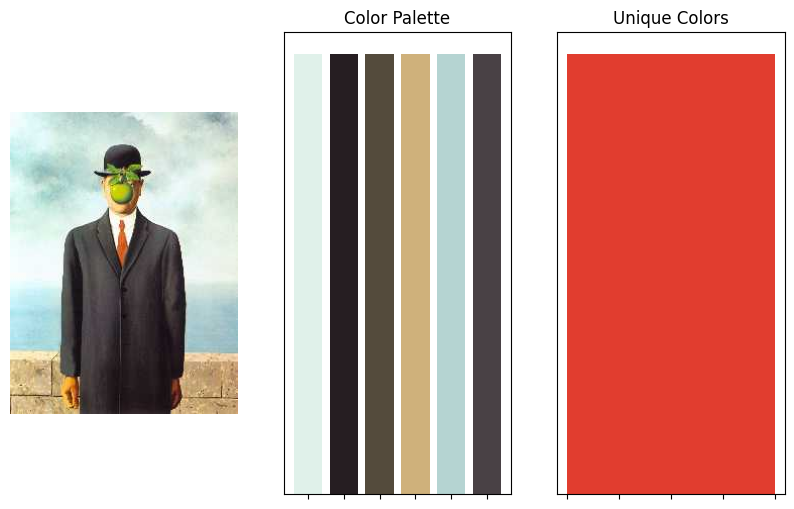

Processing row 13
13
Cluster Label Names:  ['Yellow-Greens', 'Purples', 'Blacks', 'Light-Browns / Tans', 'Blues', 'Yellows']
Counter({'Light-Greys / Off-Whites': 4767, 'Greens': 3410, 'Dark-Greys': 3232, 'Dark-Browns': 2375, 'Cyans': 1722, 'Oranges': 1058, 'Pinks': 779, 'Reds': 728, 'Red-Oranges': 418})
Color Labels after Similarity Function ['Light-Greys / Off-Whites' 'Pinks' 'Red-Oranges' 'Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 5.612586951254927 92.5 45.48351648351648
5.612586951254927 75 45.48351648351648
#ca2d1c
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


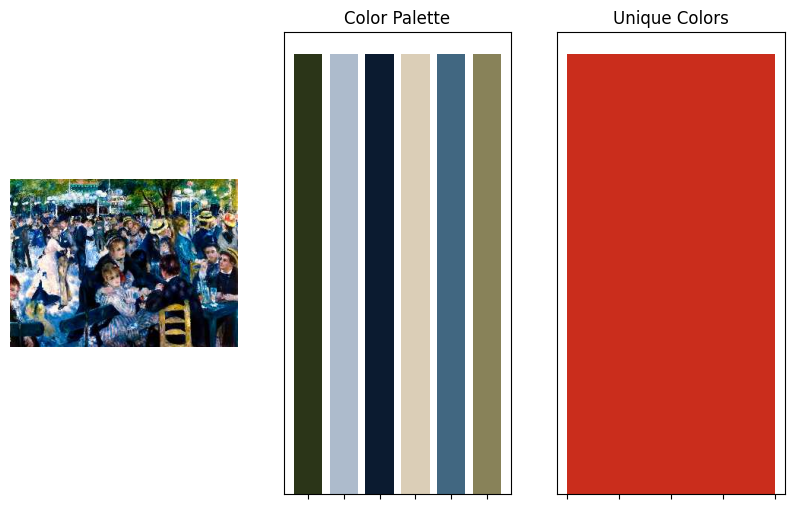

Processing row 14
14
Cluster Label Names:  ['Pinks', 'Light-Browns / Tans', 'Dark-Browns', 'Light-Greys / Off-Whites', 'Blacks', 'Light-Greys / Off-Whites']
Counter({'Dark-Greys': 4771, 'Oranges': 3051, 'Yellows': 2839, 'Purples': 591, 'Magenta-Pinks': 493, 'Reds': 392, 'Red-Oranges': 318})
Color Labels after Similarity Function ['Oranges' 'Purples' 'Red-Oranges' 'Reds']
MOST CONTRASTING LABEL:  Purples
MOST INTERESTING HSL BEFORE MODIFICATION 270.77904692949477 21.11764705882353 35.388888888888886
270.77904692949477 40 35.388888888888886
#5b367e
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


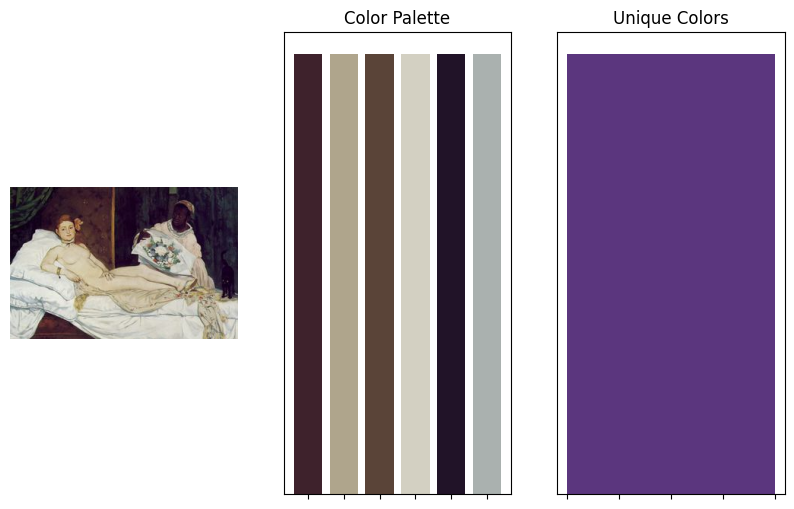

Processing row 15
15
Cluster Label Names:  ['Dark-Greys', 'Oranges', 'Dark-Greys', 'Yellows', 'Dark-Browns', 'Yellows']
Counter({'Light-Browns / Tans': 15640, 'Light-Greys / Off-Whites': 6098, 'Blacks': 2811, 'Red-Oranges': 1268, 'Pinks': 907, 'Yellow-Greens': 676, 'Reds': 237})
Color Labels after Similarity Function ['Pinks']
MOST CONTRASTING LABEL:  Pinks
MOST INTERESTING HSL BEFORE MODIFICATION 344.4166568270094 27.915887850467286 20.045454545454543
344.4166568270094 40 35
#7c3548
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


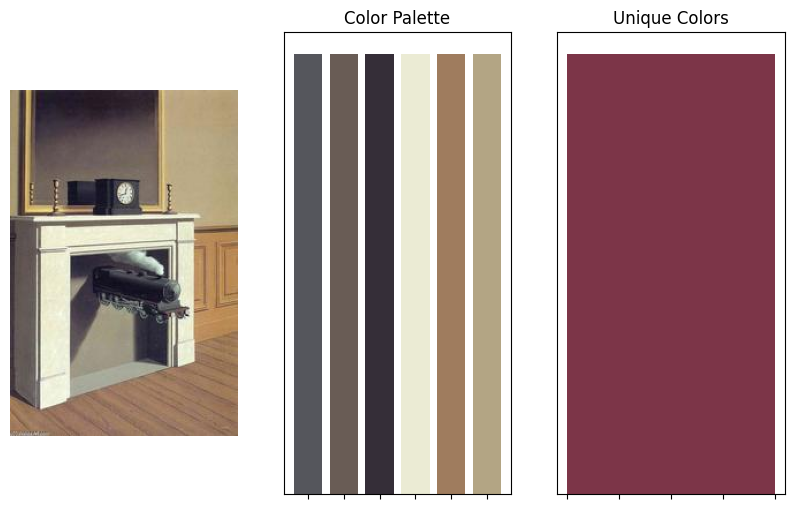

Processing row 16
16
Cluster Label Names:  ['Reds', 'Pinks', 'Blues', 'Dark-Browns', 'Light-Browns / Tans', 'Light-Browns / Tans']
Counter({'Oranges': 6818, 'Light-Greys / Off-Whites': 4705, 'Dark-Greys': 2206, 'Red-Oranges': 2067})
Color Labels after Similarity Function ['Light-Greys / Off-Whites']
MOST CONTRASTING LABEL:  None
This image does not have contrasting Unique Colors.


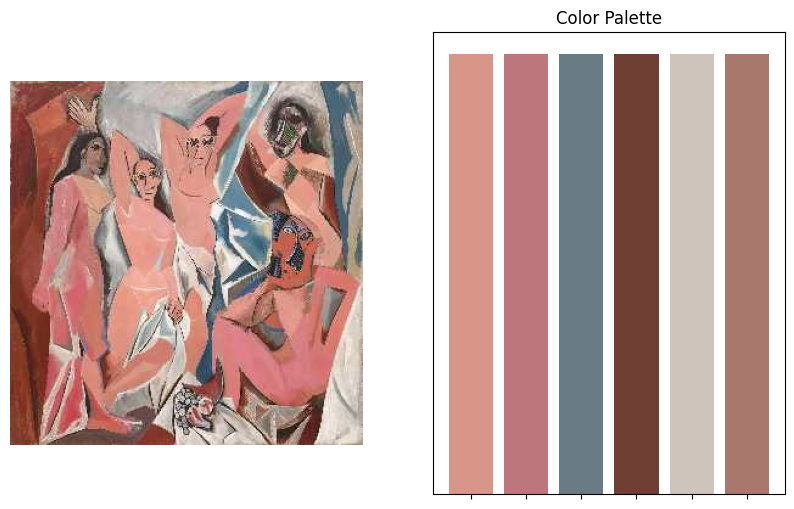

Processing row 17
17
Cluster Label Names:  ['Blacks', 'Yellows', 'Dark-Greys', 'Dark-Greys', 'Blacks', 'Oranges']
Counter({'Dark-Browns': 4334, 'Reds': 429, 'Light-Browns / Tans': 422, 'Red-Oranges': 336, 'Purples': 295, 'Pinks': 255})
Color Labels after Similarity Function ['Pinks' 'Purples']
MOST CONTRASTING LABEL:  Pinks
MOST INTERESTING HSL BEFORE MODIFICATION 342.36962247681396 26.266666666666666 16.5
342.36962247681396 40 35
#7c354a
Blackish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


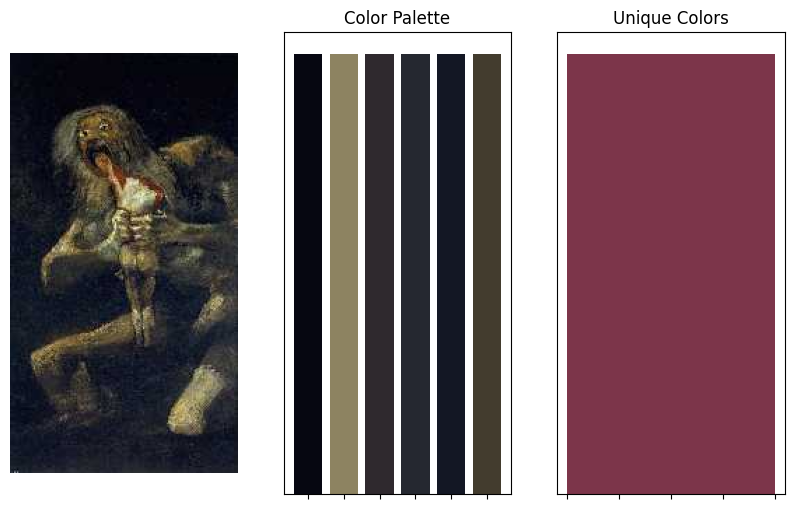

Processing row 18
18
Cluster Label Names:  ['Purples', 'Dark-Browns', 'Blacks', 'Light-Browns / Tans', 'Purples', 'Light-Greys / Off-Whites']
Counter({'Blues': 4692, 'Oranges': 3578, 'Dark-Greys': 3437, 'Yellows': 1623, 'Red-Oranges': 1266, 'Reds': 518, 'Pinks': 315})
Color Labels after Similarity Function ['Oranges' 'Pinks' 'Red-Oranges' 'Reds']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 5.872840087028853 98.0 51.0
5.872840087028853 75 51.0
#df3624
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


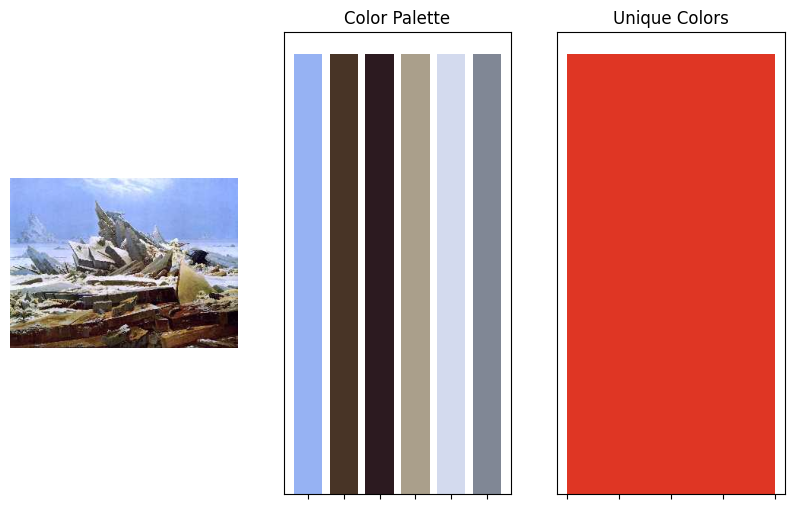

Processing row 19
19
Cluster Label Names:  ['Dark-Browns', 'Light-Greys / Off-Whites', 'Light-Greys / Off-Whites', 'Light-Browns / Tans', 'Pinks', 'Dark-Browns']
Counter({'Blacks': 4493, 'Oranges': 2857, 'Yellows': 2715, 'Greens': 2339, 'Yellow-Greens': 2198, 'Reds': 1129, 'Blues': 1042, 'Dark-Greys': 514, 'Red-Oranges': 403})
Color Labels after Similarity Function ['Blues' 'Greens' 'Oranges' 'Red-Oranges' 'Reds' 'Yellow-Greens']
MOST CONTRASTING LABEL:  Reds
MOST INTERESTING HSL BEFORE MODIFICATION 4.617387864313513 92.36363636363637 54.16666666666667
4.617387864313513 75 54.16666666666667
#e13f32
Brownish


C:\Users\The Lappy\Desktop\ML PROJECTS MAIN DIRECTORY\Color Palette Extractor\Color_Palette_Extractor_V3.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(['']*len(unique_color_hex))


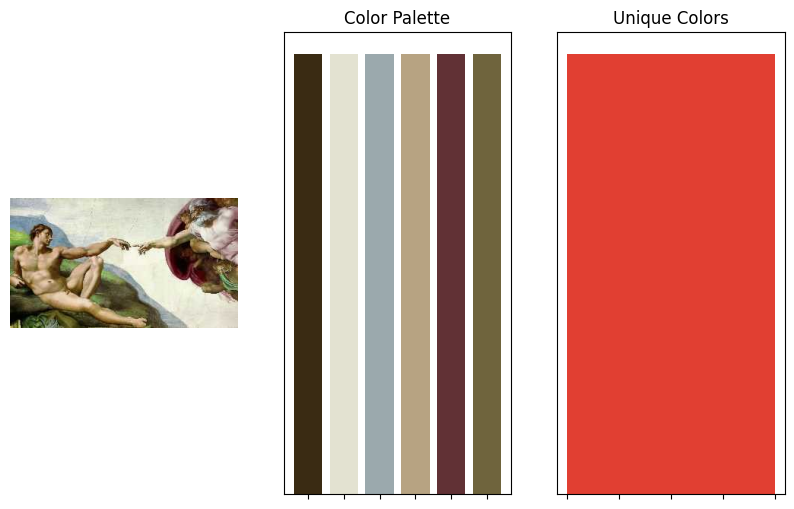

In [19]:
#Test on first 20 rows
# Loop over the first 20 rows of the dataframe
for i in range(20):
    print(f"Processing row {i}")
    # Get the image path from the "Images" column
    image_path = df.loc[i, 'Image']
    print(i)
    
    # Call get_palette function to extract the color palette and display the results
    color_palette_hex_values, category, unique_colors_hex = get_palette(image_path, show=True)


## Store Color Palette Info in DataFrame

In [21]:
print( len(df['Image']))

500


In [22]:
art_data = df.copy()

In [23]:
art_data.head()


,Image,Artist,Work
0,https://en.most-famous-paintings.com/Art.nsf/O...,Leonardo Da Vinci,Mona Lisa
1,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night
2,https://en.most-famous-paintings.com/Art.nsf/O...,Edvard Munch,The Scream
3,https://en.most-famous-paintings.com/Art.nsf/O...,Pablo Picasso,Three Musicians
4,https://en.most-famous-paintings.com/Art.nsf/O...,Jan Vermeer,The Girl with a Pearl Earring


In [24]:
art_data = df.copy()

# Initialize new columns for color palette hex values, image category, and unique color
art_data['CP Hex1'] = ''
art_data['CP Hex2'] = ''
art_data['CP Hex3'] = ''
art_data['CP Hex4'] = ''
art_data['CP Hex5'] = ''
art_data['CP Hex6'] = ''
art_data['Image_Category'] = ''
art_data['Unique_Color'] = ''


In [25]:
art_data.head()

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
0,https://en.most-famous-paintings.com/Art.nsf/O...,Leonardo Da Vinci,Mona Lisa,,,,,,,,
1,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night,,,,,,,,
2,https://en.most-famous-paintings.com/Art.nsf/O...,Edvard Munch,The Scream,,,,,,,,
3,https://en.most-famous-paintings.com/Art.nsf/O...,Pablo Picasso,Three Musicians,,,,,,,,
4,https://en.most-famous-paintings.com/Art.nsf/O...,Jan Vermeer,The Girl with a Pearl Earring,,,,,,,,


In [26]:

for i in range(len(art_data['Image'])):
    # Get the image path from the "Image" column
    image_path = art_data.loc[i, 'Image']

    # Call get_palette function to extract the color palette and display the results
    color_palette_hex_values, category, unique_color_hex = get_palette(image_path, show=False)

    # Set the color palette hex values as new columns in art_data
    art_data.loc[i, 'CP Hex1':'CP Hex6'] = color_palette_hex_values

    # Set the image category and unique color hex as new columns in art_data
    art_data.loc[i, 'Image_Category'] = category
    art_data.loc[i, 'Unique_Color'] = unique_color_hex


In [27]:
art_data.head()

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
0,https://en.most-famous-paintings.com/Art.nsf/O...,Leonardo Da Vinci,Mona Lisa,#89a09a,#3c252e,#503223,#576a69,#d9ae74,#8a623b,Brownish,#a1544d
1,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night,#4e84b2,#8db8ca,#17273b,#1c221b,#25508e,#bec68c,Blueish,#ded63b
2,https://en.most-famous-paintings.com/Art.nsf/O...,Edvard Munch,The Scream,#63788a,#d79b6c,#46353c,#5c4d41,#a67e84,#202f3b,Brownish,#dc3828
3,https://en.most-famous-paintings.com/Art.nsf/O...,Pablo Picasso,Three Musicians,#887651,#e2e9b8,#524196,#271708,#61370e,#ba6d12,Brownish,None
4,https://en.most-famous-paintings.com/Art.nsf/O...,Jan Vermeer,The Girl with a Pearl Earring,#030208,#937e40,#84b4d4,#252110,#dec89d,#19385c,Brownish,#ca2b1c


**We need to check for duplicates and remove them.**

In [28]:
duplicate_rows = df[df.duplicated(subset=['Artist', 'Work'], keep=False)]
print(duplicate_rows)


                                                 Image                 Artist   
1    https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh  \
7    https://en.most-famous-paintings.com/Art.nsf/O...           Claude Monet   
17   https://en.most-famous-paintings.com/Art.nsf/O...      Francisco De Goya   
43   https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
118  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
125  https://en.most-famous-paintings.com/Art.nsf/O...            Edgar Degas   
127  https://en.most-famous-paintings.com/Art.nsf/O...            Edgar Degas   
128  https://en.most-famous-paintings.com/Art.nsf/O...            Edgar Degas   
161  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
162  https://en.most-famous-paintings.com/Art.nsf/O...           Paul Cezanne   
205  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
313  https://en.most-famous-

In [29]:
df.drop_duplicates(subset=["Work", "Artist"], keep="first", inplace=True)


In [30]:
art_data.describe()

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
count,500,500,500,500,500,500,500,500,500,500,372
unique,500,136,480,499,499,500,500,500,500,6,357
top,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night,#c2c09a,#4b3137,#503223,#576a69,#d9ae74,#8a623b,Brownish,#7c3a35
freq,1,61,4,2,2,1,1,1,1,372,6


In [31]:
duplicate_rows = art_data[art_data.duplicated(['Artist', 'Work'])]
print(duplicate_rows)



                                                 Image                 Artist   
118  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh  \
127  https://en.most-famous-paintings.com/Art.nsf/O...            Edgar Degas   
128  https://en.most-famous-paintings.com/Art.nsf/O...            Edgar Degas   
205  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
319  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
324  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
328  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
331  https://en.most-famous-paintings.com/Art.nsf/O...       Vincent Van Gogh   
359  https://en.most-famous-paintings.com/Art.nsf/O...      Francisco De Goya   
391  https://en.most-famous-paintings.com/Art.nsf/O...           Paul Cezanne   
396  https://en.most-famous-paintings.com/Art.nsf/O...           Paul Cezanne   
400  https://en.most-famous-

In [32]:
art_data.head()

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
0,https://en.most-famous-paintings.com/Art.nsf/O...,Leonardo Da Vinci,Mona Lisa,#89a09a,#3c252e,#503223,#576a69,#d9ae74,#8a623b,Brownish,#a1544d
1,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night,#4e84b2,#8db8ca,#17273b,#1c221b,#25508e,#bec68c,Blueish,#ded63b
2,https://en.most-famous-paintings.com/Art.nsf/O...,Edvard Munch,The Scream,#63788a,#d79b6c,#46353c,#5c4d41,#a67e84,#202f3b,Brownish,#dc3828
3,https://en.most-famous-paintings.com/Art.nsf/O...,Pablo Picasso,Three Musicians,#887651,#e2e9b8,#524196,#271708,#61370e,#ba6d12,Brownish,None
4,https://en.most-famous-paintings.com/Art.nsf/O...,Jan Vermeer,The Girl with a Pearl Earring,#030208,#937e40,#84b4d4,#252110,#dec89d,#19385c,Brownish,#ca2b1c


In [33]:
art_data.tail()

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
495,https://en.most-famous-paintings.com/Art.nsf/O...,Ernst Ludwig Kirchner,The Judgement of Paris,#311e0f,#ecd194,#b59229,#34171b,#664c2b,#ac9165,Brownish,#cb4334
496,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Water Lilies,#4d5f45,#ad964c,#857045,#423a42,#dcc96c,#5e4e2d,Brownish,#cb3828
497,https://en.most-famous-paintings.com/Art.nsf/O...,George Grosz,The Agitator,#d0bda7,#684f3e,#405367,#9e8775,#7f4d55,#b6882f,Brownish,#df3521
498,https://en.most-famous-paintings.com/Art.nsf/O...,Tom Wesselmann,Still life no. 20,#9c070d,#b68c76,#eff5f4,#931d12,#122135,#decfc0,Brownish,#1ed394
499,https://en.most-famous-paintings.com/Art.nsf/O...,Peder Severin Kroyer,Tarde de verano en Skagen,#6a4953,#999fb1,#ab9c94,#b8aeb3,#9eaacc,#d3beb2,Redish,None


In [34]:
art_data[art_data['Artist'] == 'Claude Monet']

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
7,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Water Lilies,#546e55,#5c7991,#204377,#c6dcbf,#87a183,#7b9aba,Greenish,None
30,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,"Gare Saint Lazare, Pari",#919677,#675c43,#82879a,#2b1f25,#34251b,#b6caa5,Brownish,#7c3a35
76,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,"Grainstack in the Morning, Snow Effect",#8d90ab,#b2a895,#4f333d,#bbbccd,#623e25,#606a96,Brownish,#d74739
136,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,The Walk. Lady with a Parasol,#9caebc,#575c38,#6e8193,#808465,#374837,#bebaae,Blueish,#9c3816
143,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,The Thames below Westminster,#76705f,#af9f7d,#322b20,#9d8d6d,#545254,#584f3f,Brownish,None
150,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Clifftop Walk at Pourville,#7a7852,#9fb6c6,#7a9593,#63a5ce,#aea287,#634e5b,Brownish,#e03421
178,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,The River,#3d2d39,#d0bfae,#7d5d4a,#84767f,#a98f7a,#462b1f,Brownish,#52309f
197,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Poplars at Giverny,#848164,#435a56,#535a3e,#859197,#b8ab95,#92838a,Brownish,#1f28a8
206,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,"Rouen Cathedral, Symphony in Grey and Rose",#c2a7b9,#90716c,#9294b3,#dacfe6,#8f7686,#594f68,Blueish,#cd1d9d
209,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,le bassin aux nympheas - reflets verts,#5b7191,#7c785e,#adb7ce,#3f5176,#7e6073,#7991b2,Blueish,#cf2214


In [35]:
# Drop duplicate rows based on 'Work' and 'Artist' columns
art_data.drop_duplicates(subset=['Work', 'Artist'], keep='first', inplace=True)


In [36]:
art_data[art_data['Artist'] == 'Claude Monet']

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
7,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Water Lilies,#546e55,#5c7991,#204377,#c6dcbf,#87a183,#7b9aba,Greenish,None
30,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,"Gare Saint Lazare, Pari",#919677,#675c43,#82879a,#2b1f25,#34251b,#b6caa5,Brownish,#7c3a35
76,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,"Grainstack in the Morning, Snow Effect",#8d90ab,#b2a895,#4f333d,#bbbccd,#623e25,#606a96,Brownish,#d74739
136,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,The Walk. Lady with a Parasol,#9caebc,#575c38,#6e8193,#808465,#374837,#bebaae,Blueish,#9c3816
143,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,The Thames below Westminster,#76705f,#af9f7d,#322b20,#9d8d6d,#545254,#584f3f,Brownish,None
150,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Clifftop Walk at Pourville,#7a7852,#9fb6c6,#7a9593,#63a5ce,#aea287,#634e5b,Brownish,#e03421
178,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,The River,#3d2d39,#d0bfae,#7d5d4a,#84767f,#a98f7a,#462b1f,Brownish,#52309f
197,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,Poplars at Giverny,#848164,#435a56,#535a3e,#859197,#b8ab95,#92838a,Brownish,#1f28a8
206,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,"Rouen Cathedral, Symphony in Grey and Rose",#c2a7b9,#90716c,#9294b3,#dacfe6,#8f7686,#594f68,Blueish,#cd1d9d
209,https://en.most-famous-paintings.com/Art.nsf/O...,Claude Monet,le bassin aux nympheas - reflets verts,#5b7191,#7c785e,#adb7ce,#3f5176,#7e6073,#7991b2,Blueish,#cf2214


In [37]:
art_data.shape

(484, 11)

In [38]:
art_data.head()

,Image,Artist,Work,CP Hex1,CP Hex2,CP Hex3,CP Hex4,CP Hex5,CP Hex6,Image_Category,Unique_Color
0,https://en.most-famous-paintings.com/Art.nsf/O...,Leonardo Da Vinci,Mona Lisa,#89a09a,#3c252e,#503223,#576a69,#d9ae74,#8a623b,Brownish,#a1544d
1,https://en.most-famous-paintings.com/Art.nsf/O...,Vincent Van Gogh,The Starry Night,#4e84b2,#8db8ca,#17273b,#1c221b,#25508e,#bec68c,Blueish,#ded63b
2,https://en.most-famous-paintings.com/Art.nsf/O...,Edvard Munch,The Scream,#63788a,#d79b6c,#46353c,#5c4d41,#a67e84,#202f3b,Brownish,#dc3828
3,https://en.most-famous-paintings.com/Art.nsf/O...,Pablo Picasso,Three Musicians,#887651,#e2e9b8,#524196,#271708,#61370e,#ba6d12,Brownish,None
4,https://en.most-famous-paintings.com/Art.nsf/O...,Jan Vermeer,The Girl with a Pearl Earring,#030208,#937e40,#84b4d4,#252110,#dec89d,#19385c,Brownish,#ca2b1c


In [39]:
art_data.to_csv('clean_art_palette_data.csv')